### Import Package

In [2]:
import pandas as pd
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Dataset yang digunakan

In [3]:
data = pd.read_csv("PrediksiHargaRumah.csv")
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


### Dataset yang digunakan telah bersih (Tidak ada data Null & Duplikat)

In [4]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [5]:
data.duplicated().sum()

0

### Mengubah nama atribut

In [6]:
data = data.rename(columns={'BHK':'Dapur, Kamar Tidur, Hall','Bathroom':'Kamar Mandi',
                            'Furnishing':'Perabotan','Locality':'Lokasi','Parking':'Parkir',
                            'Price':'Harga','Transaction':'Pembayaran','Type':'Tipe','Per_Sqft':'Luas Rumah'})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      1176 non-null   float64
 1   Dapur, Kamar Tidur, Hall  1176 non-null   int64  
 2   Kamar Mandi               1176 non-null   float64
 3   Perabotan                 1176 non-null   object 
 4   Lokasi                    1176 non-null   object 
 5   Parkir                    1176 non-null   float64
 6   Harga                     1176 non-null   int64  
 7   Status                    1176 non-null   object 
 8   Pembayaran                1176 non-null   object 
 9   Tipe                      1176 non-null   object 
 10  Luas Rumah                1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 101.2+ KB


### Split Data

In [8]:
x = data[['Area', 'Dapur, Kamar Tidur, Hall', 'Parkir', 'Luas Rumah']]
y = data['Harga']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Algoritma yang digunakan
#### 1. K-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 

In [11]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(x_test, y_test)

0.0226628895184136

In [13]:
y_pred = knn.predict(x_test) 

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     1000000       0.00      0.00      0.00         2
     1200000       0.00      0.00      0.00         0
     1490000       0.00      0.00      0.00         0
     1500000       0.25      0.25      0.25         4
     1550000       0.00      0.00      0.00         1
     1600000       0.00      0.00      0.00         3
     1650000       0.00      0.00      0.00         1
     1700000       0.00      0.00      0.00         2
     1800000       0.00      0.00      0.00         1
     1850000       0.00      0.00      0.00         1
     1900000       0.00      0.00      0.00         0
     1950000       0.00      0.00      0.00         0
     2000000       0.50      0.40      0.44         5
     2100000       0.00      0.00      0.00         1
     2200000       0.00      0.00      0.00         2
     2300000       0.00      0.00      0.00         3
     2350000       0.00      0.00      0.00         0
     2400000       0.00    

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

#### 2. Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2, 4, 5, 6, 7]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 5, 6, 7]}, scoring='accuracy')

In [17]:
print(grid.best_params_)

{'max_depth': 2}


In [18]:
dt = DecisionTreeClassifier(max_depth=2)

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
dt_pred = dt.predict(x_test)

In [21]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

     1000000       0.00      0.00      0.00         2
     1500000       0.00      0.00      0.00         4
     1550000       0.00      0.00      0.00         1
     1600000       0.00      0.00      0.00         3
     1650000       0.00      0.00      0.00         1
     1700000       0.00      0.00      0.00         2
     1800000       0.00      0.00      0.00         1
     1850000       0.00      0.00      0.00         1
     2000000       0.00      0.00      0.00         5
     2100000       0.00      0.00      0.00         1
     2200000       0.00      0.00      0.00         2
     2300000       0.00      0.00      0.00         3
     2400000       0.00      0.00      0.00         2
     2500000       0.00      0.00      0.00         2
     2600000       0.00      0.00      0.00         3
     2670000       0.00      0.00      0.00         1
     2700000       0.00      0.00      0.00         1
     2850000       0.00    

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

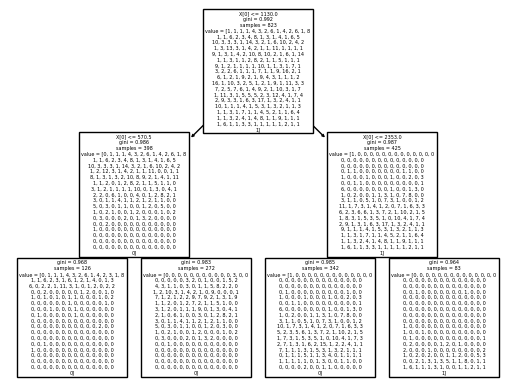

In [22]:
from sklearn import tree

tree.plot_tree(dt)
plt.show()

### Score dari kedua algoritma 
#### - Score Algoritma KNN = 0,02
#### - Score Algoritma Decision Tree = 0,03 

### Visualisasi untuk Regression

In [23]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

In [24]:
lg.fit(data[['Area']], data.Harga)

LinearRegression()

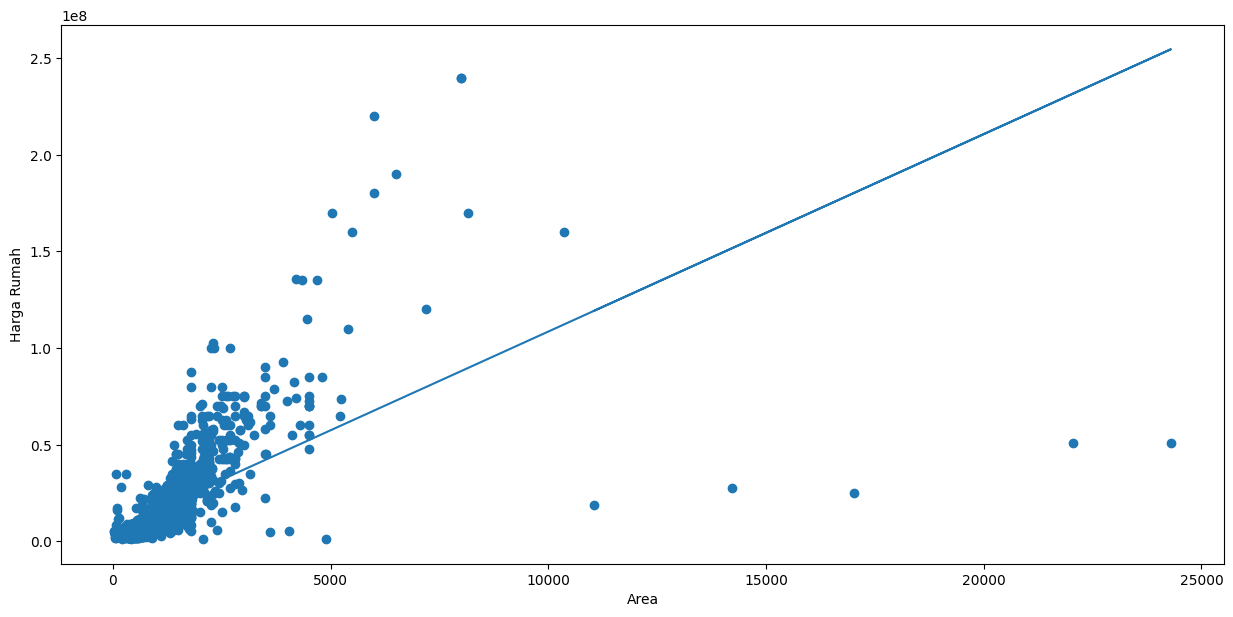

In [25]:
plt.figure(figsize=(15, 7))
plt.xlabel('Area')
plt.ylabel('Harga Rumah')
plt.scatter(data[['Area']], data.Harga)
plt.plot(data[['Area']], lg.predict(data[['Area']]))